# Tarea: Modelos lineales, regularización y selección de modelos en datos reales

Importamos las librerias necesaria 

In [3]:
#importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Parte A: Parte A. Regresión lineal desde cero


1. Usando LinearRegression de sklearn

In [21]:
# Paso 2: Cargar dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target.values
data.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
# Paso 3: Crear conjunto de entrenamiento y prueba
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [23]:
# Paso 4: Estandarizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [24]:
# Ajustar modelo sklearn
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred_sklearn = linreg.predict(X_test_scaled)

print("Intercepto sklearn:", linreg.intercept_)
print("Coeficientes sklearn:", linreg.coef_)
print("R2 sklearn:", r2_score(y_test, y_pred_sklearn))

Intercepto sklearn: 2.0719469373788777
Coeficientes sklearn: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
R2 sklearn: 0.5757877060324508


In [25]:
# Paso 5: Ajustar modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
# Paso 6: Predecir valores en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [27]:
# Ver primeras predicciones
print(y_pred[:100])

[0.71912284 1.76401657 2.70965883 2.83892593 2.60465725 2.01175367
 2.64550005 2.16875532 2.74074644 3.91561473 0.93896156 1.90122177
 1.75871178 2.2501598  2.54086976 1.9174049  2.38648295 2.01093032
 2.22740934 1.11853152 2.93313079 2.66093621 1.87766908 3.35191825
 2.24464197 0.9014366  1.8449956  1.6369503  1.91889167 3.25426439
 1.57169066 1.12682228 2.05756587 3.68812416 2.41354842 2.55397472
 2.79754439 1.85390456 1.08158746 1.8522518  3.09823826 1.42463188
 1.04433232 2.06051147 1.75974509 1.89626502 2.0164856  1.84428638
 2.07114798 1.44277603 2.4037255  1.72660985 1.87251181 0.72563641
 1.87861287 2.08821647 0.84609608 2.46223258 2.49468168 2.18895351
 2.53922509 1.87697634 1.11901171 1.2997807  2.98637472 2.18457948
 1.78909262 1.94215128 1.56686829 1.72560664 0.19466372 2.69308079
 1.24092403 1.95322699 2.19362365 2.00822005 3.32697943 2.08010843
 2.40899444 1.83823061 0.76844471 1.61409493 1.5899637  1.37263857
 3.44966224 2.4618166  1.49543084 0.79135819 1.60778401 1.9360

2. MCO de forma cerrada (Closed-form OLS con NumPy)

In [28]:
# Agregar columna de 1s para el intercepto
X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_bias  = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

In [29]:
# Fórmula β = (XᵀX)^(-1) Xᵀy
beta_hat = np.linalg.inv(X_train_bias.T @ X_train_bias) @ (X_train_bias.T @ y_train)

intercept_ols = beta_hat[0]
coef_ols = beta_hat[1:]
y_pred_ols = X_test_bias @ beta_hat

print("Intercepto OLS:", intercept_ols)
print("Coeficientes OLS:", coef_ols)
print("R2 OLS:", r2_score(y_test, y_pred_ols))


Intercepto OLS: 2.071946937378877
Coeficientes OLS: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
R2 OLS: 0.5757877060324512


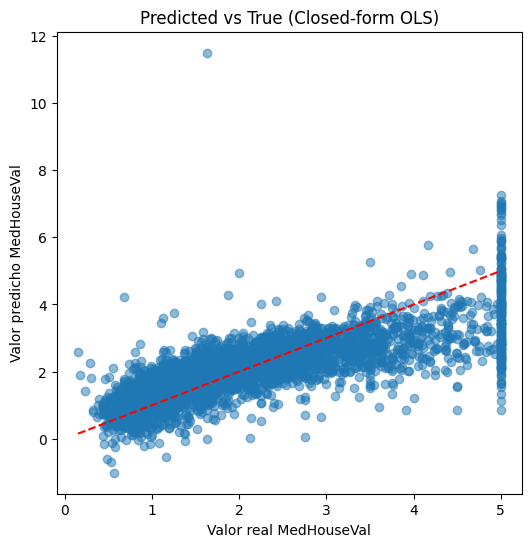

In [30]:
# Plot pred vs real
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ols, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], "r--")
plt.xlabel("Valor real MedHouseVal")
plt.ylabel("Valor predicho MedHouseVal")
plt.title("Predicted vs True (Closed-form OLS)")
plt.show()

3. Descenso de gradiente (implementación desde cero)